In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### load a dataset

In [11]:
house= fetch_california_housing(as_frame=True)

In [33]:
data=house.frame

In [35]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Basic Exploration (EDA)

In [43]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [45]:
# Rename column
data.rename(columns={"MedHouseVal":"price"},inplace=True)

In [94]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:
data.shape

(20640, 9)

In [53]:
print(data.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')


In [55]:
X=data.drop("price",axis=1)

In [57]:
y=data["price"]

In [59]:
print(X.shape)

(20640, 8)


In [61]:
print(y.shape)

(20640,)


In [96]:
print(X.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [98]:
print(y.head())

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: price, dtype: float64


### Missing value

In [144]:
print(data.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


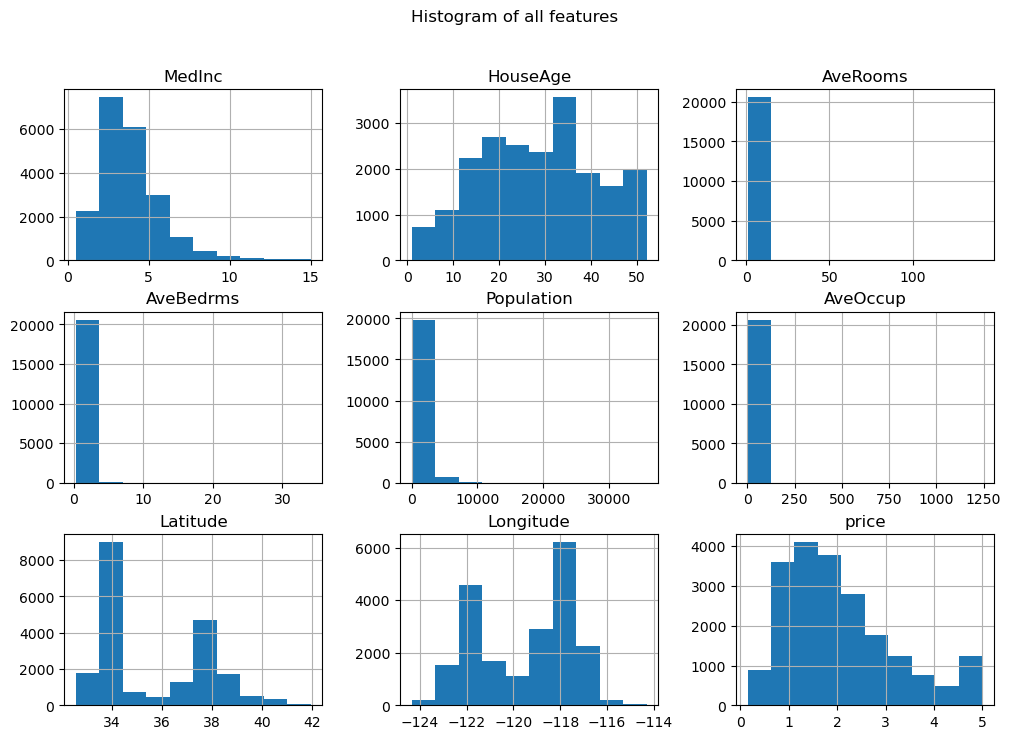

In [146]:
data.hist(figsize=(12,8))
plt.suptitle("Histogram of all features")
plt.show()

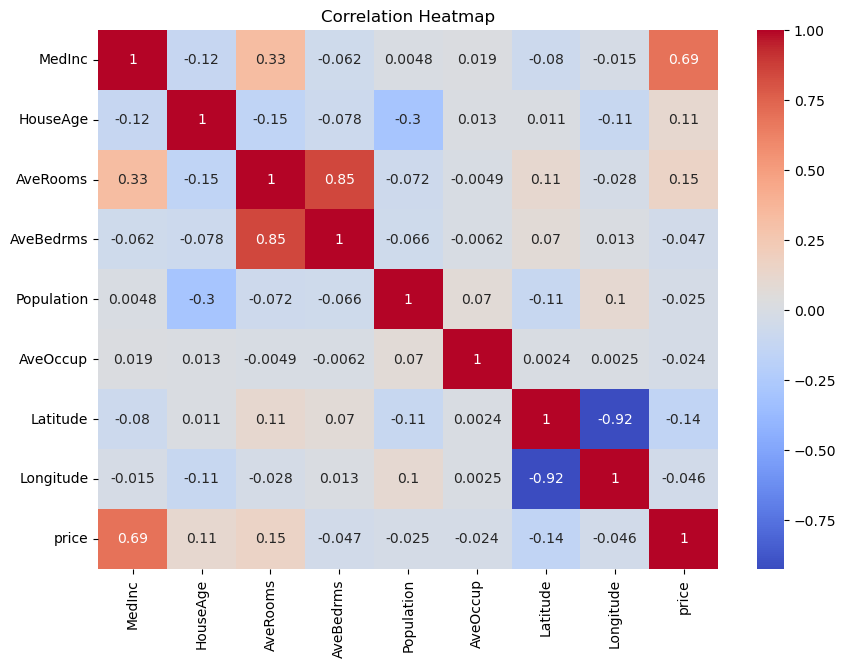

In [102]:
plt.figure(figsize=(10,7))

sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")

plt.show()


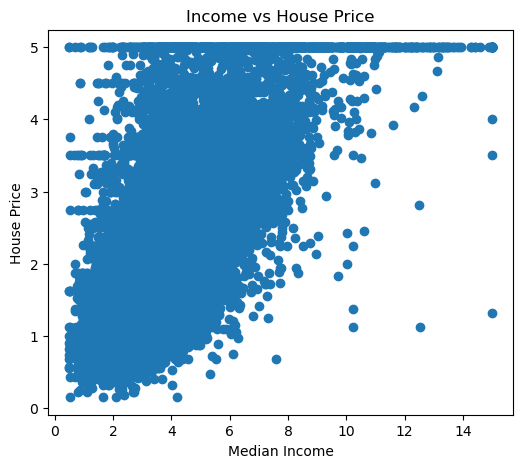

In [104]:
plt.figure(figsize=(6,5))

plt.scatter(data["MedInc"], data["price"])

plt.xlabel("Median Income")
plt.ylabel("House Price")

plt.title("Income vs House Price")

plt.show()


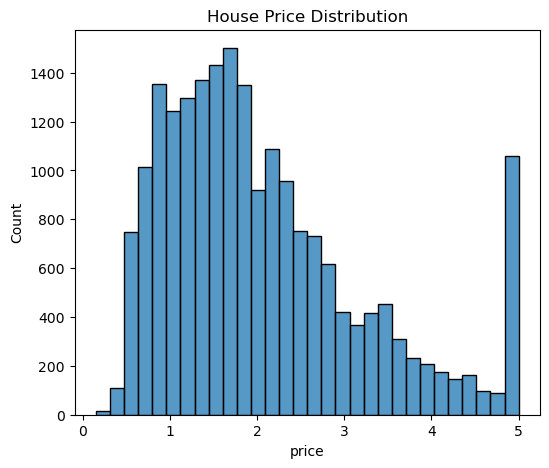

In [106]:
plt.figure(figsize=(6,5))

sns.histplot(data["price"], bins=30)

plt.title("House Price Distribution")

plt.show()


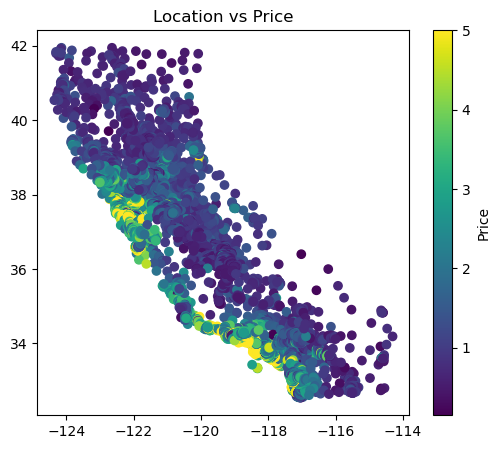

In [82]:
plt.figure(figsize=(6,5))

plt.scatter(data["Longitude"], data["Latitude"], c=data["price"])

plt.colorbar(label="Price")

plt.title("Location vs Price")

plt.show()


In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [110]:
print(X_train.shape)
print(X_test.shape)


(16512, 8)
(4128, 8)


In [112]:

model = LinearRegression()


In [114]:
model.fit(X_train, y_train)


LinearRegression()

In [116]:
y_pred = model.predict(X_test)


In [118]:
print("Predicted prices:", y_pred[:5])


Predicted prices: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]


In [123]:
mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.5332001304956557
RMSE: 0.7455813830127763
R2 Score: 0.575787706032451


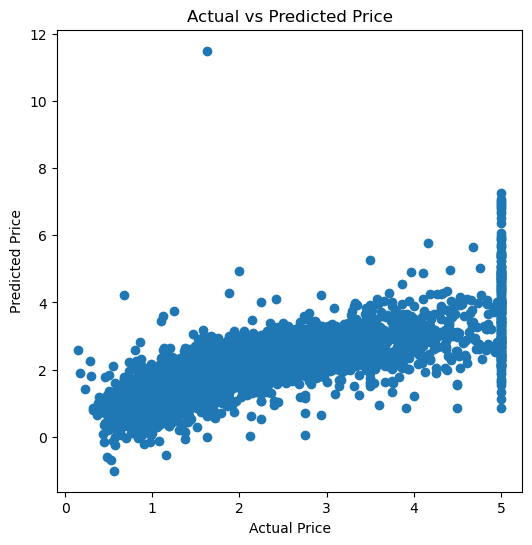

In [127]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.title("Actual vs Predicted Price")

plt.show()


In [129]:
import joblib

joblib.dump(model, "house_price_model.pkl")

print("Model saved successfully")


Model saved successfully
